# Хайп, лютый хайп тик-так

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
L, H = 100, 100
nx, ny = 100, 100
N = 100
D = 1.0
dx = L / nx
C = 0.1
dt = C * dx ** 2 / D

In [5]:
T = np.zeros((2, N, N))
T[:, :, 0] = 100.0
print(T)

[[[100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]
  ...
  [100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]]

 [[100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]
  ...
  [100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]
  [100.   0.   0. ...   0.   0.   0.]]]


In [24]:
def diffuse_proto(
        it: int,
        T: np.ndarray,
        D: float,
        dx: float,
        dt: float,
):
        # T[0] -> T[1]
        # T[1] -> T[0]
        prev = it % 2
        cur = (it + 1) % 2
        alpha = dt * D / dx ** 2

        T[cur, 1:-1, 1:-1] = T[prev, 1:-1, 1:-1] + alpha * (
        T[prev, 0:-2, 1:-1] +
        T[prev, 1:-1, 0:-2] +
        T[prev, 1:-1, 2:] +
        T[prev, 2:, 1:-1] -
         4 * T[prev, 1:-1, 1:-1]
        )


In [25]:
T = np.zeros((2, ny, nx))
T[:, :, 0] = 100.0

for it in range(10000):
    diffuse_proto(it, T, D, dx, dt)

print(T)

[[[1.00000000e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+02 4.99829627e+01 3.02006671e+01 ... 1.23018524e-02
   6.14315068e-03 0.00000000e+00]
  [1.00000000e+02 6.97311969e+01 4.99318771e+01 ... 2.45903033e-02
   1.22796108e-02 0.00000000e+00]
  ...
  [1.00000000e+02 6.97311969e+01 4.99318771e+01 ... 2.45903033e-02
   1.22796108e-02 0.00000000e+00]
  [1.00000000e+02 4.99829627e+01 3.02006671e+01 ... 1.23018524e-02
   6.14315068e-03 0.00000000e+00]
  [1.00000000e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[1.00000000e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e+02 4.99829614e+01 3.02006644e+01 ... 1.23000804e-02
   6.14226452e-03 0.00000000e+00]
  [1.00000000e+02 6.97311943e+01 4.99318719e+01 ... 2.45867610e-02
   1.22778393e-02 0.00000000e+00]
  ...
  [1.00000000e+02 6.97311943e+01 4.99318719e+01 ... 2.45867610e-02
   1.22778

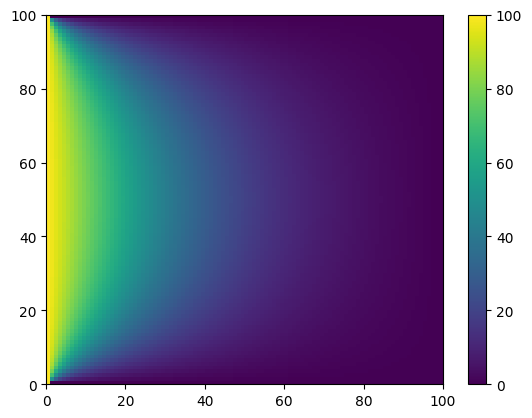

In [29]:
plt.pcolormesh(T[1])
plt.colorbar()

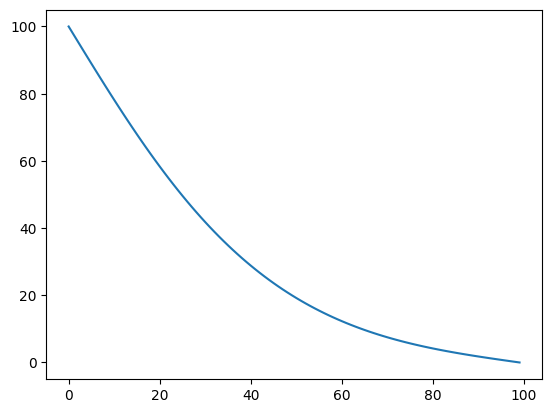

In [30]:
plt.plot(np.arange(nx)*dx, T[0, 50])

In [31]:
T = np.zeros((2, ny, nx))
T[:, :, 0] = 100.0
T[:, 0, :] = 100.0

for it in range(10000):
    diffuse_proto(it, T, D, dx, dt)

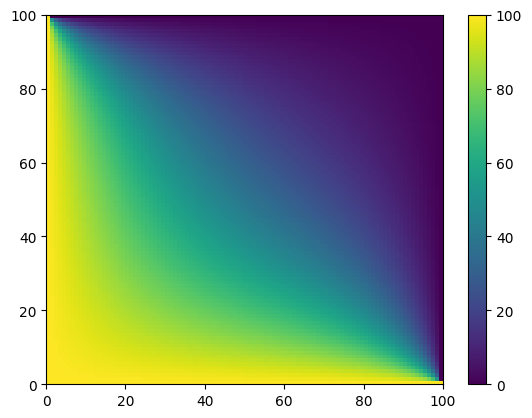

In [33]:
plt.pcolormesh(T[0])
plt.colorbar()

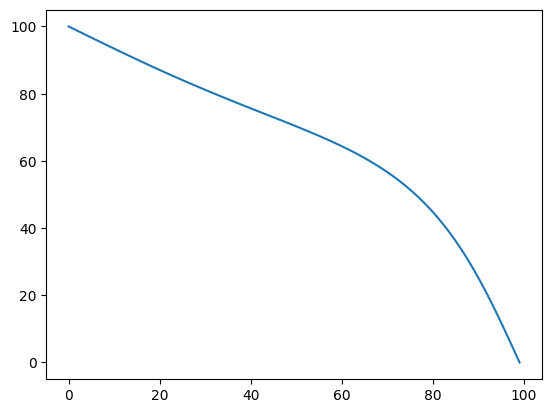

In [34]:
plt.plot(np.arange(nx)*dx, T[0, 20])